In [1]:
import pandas as pd
import numpy as py
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('./data/aus_shark_v7.csv')
main_df

,UIN,Incident.month,Incident.year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,Victim.activity,Injury.location,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category
0,1,1,1791,fatal,NSW,-33.86666667,151.2,coastal,white shark,unprovoked,swimming,torso,fatal,female,999,unknown,0.0,0m to 1.5m
1,2,3,1803,injured,WA,-25.83333333,113.8833333,coastal,tiger shark,unprovoked,swimming,NaN,injury unknown,male,999,unknown,0.0,0m to 1.5m
2,3,1,1807,injured,NSW,-33.86666667,151.2,estuary/harbour,bull shark,unprovoked,swimming,"arm, hand",minor lacerations,male,999,unknown,999.0,Unknown
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,swimming,leg,fatal,male,999,unknown,1.0,0m to 1.5m
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,swimming,leg,minor lacerations,male,15,unknown,999.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1229,12,2023,fatal,SA,-34.679356,137.684906.,coastal,white shark,unprovoked,boarding,fatal,fatal,male,15,1300,999.0,Unknown
1228,1230,1,2024,injured,SA,-34.3333,135.7500.,coastal,unknown,unprovoked,boarding,leg,minor lacerations,male,64,unknown,999.0,Unknown
1229,1231,1,2024,injured,NSW,-32.333,152.533,estuary/harbour,bull shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown
1230,1232,2,2024,injured,WA,-30.30591,115.03825,coastal,tiger shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown


In [3]:
# We want to be able to plot a timeline for the incidents, hence create a new column which concatenate the year and month column.
main_df = main_df.rename(columns={'Incident.year': 'year', 'Incident.month':'month'})
main_df['year-month'] = pd.to_datetime(main_df[['year', 'month']].assign(DAY=1))
main_df.head()

,UIN,month,year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,Victim.activity,Injury.location,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category,year-month
0,1,1,1791,fatal,NSW,-33.86666667,151.2,coastal,white shark,unprovoked,swimming,torso,fatal,female,999,unknown,0.0,0m to 1.5m,1791-01-01
1,2,3,1803,injured,WA,-25.83333333,113.8833333,coastal,tiger shark,unprovoked,swimming,NaN,injury unknown,male,999,unknown,0.0,0m to 1.5m,1803-03-01
2,3,1,1807,injured,NSW,-33.86666667,151.2,estuary/harbour,bull shark,unprovoked,swimming,"arm, hand",minor lacerations,male,999,unknown,999.0,Unknown,1807-01-01
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,swimming,leg,fatal,male,999,unknown,1.0,0m to 1.5m,1820-01-01
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,swimming,leg,minor lacerations,male,15,unknown,999.0,Unknown,1825-01-01


In [4]:
# Now that the rows and columns are correct, let's check the datatype
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   UIN                  1232 non-null   int64         
 1   month                1232 non-null   int64         
 2   year                 1232 non-null   int64         
 3   Victim.injury        1232 non-null   object        
 4   State                1232 non-null   object        
 5   Latitude             1232 non-null   object        
 6   Longitude            1232 non-null   object        
 7   Site.category        1232 non-null   object        
 8   Shark.common.name    1232 non-null   object        
 9   Provoked/unprovoked  1232 non-null   object        
 10  Victim.activity      1232 non-null   object        
 11  Injury.location      1088 non-null   object        
 12  Injury.severity      1232 non-null   object        
 13  Victim.gender        1232 non-nul

## EDA Univariate Analysis

In [5]:
main_df.describe()

,UIN,month,year,Victim.age,Depth.of.incident.m,year-month
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232
mean,617.100649,5.941558,1968.525974,428.568994,578.242938,1968-12-08 11:30:46.753246808
min,1.000000,1.000000,1791.000000,4.000000,0.000000,1791-01-01 00:00:00
25%,308.750000,2.000000,1932.750000,22.000000,1.000000,1932-12-24 06:00:00
50%,617.500000,5.000000,1986.000000,44.000000,999.000000,1986-01-30 12:00:00
75%,925.250000,10.000000,2011.250000,999.000000,999.000000,2011-12-08 18:00:00
max,1233.000000,12.000000,2024.000000,999.000000,999.000000,2024-03-01 00:00:00
std,356.207804,4.085976,48.470759,478.134379,492.558001,NaN


### EDA Univariate Part 1 - Year, Month, Time

In [6]:
# Univariate analysis for categorical data - timeframe
fig1 = make_subplots(rows=1, cols=3, subplot_titles=("Year", "Month", "Hour of the Day"))
fig1.add_histogram(x=main_df['year'], row=1, col=1)
fig1.add_histogram(x=main_df['month'], row=1, col=2)
fig1.add_histogram(x=main_df['Hour.of.incident'], row=1, col=3)
fig1.update_layout(showlegend=False)
fig1.update_xaxes(categoryorder='array', categoryarray=['0100','0400', '0500', '0600', '0700', '0800', '0900', '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700', '1800', '1900', '2000', '2100', '2300', 'unknown'], row=1, col=3)
fig1.show()

In [7]:
# Year: More shark incidents happened in recent years - could be due to the rise of internet when it is easier for reporting.
# Month: Higher shark incidents around Dec/Jan period, which is summer in Australia and also when most people visit beaches.
# Hour of the day: Does not seem to matter across the time of the day.

In [8]:
# Find out if we need to drop any data based on 'year' column due to very low amount of info.
fig1_1 = make_subplots(rows=1, cols=1, subplot_titles=("Year"))
fig1_1.add_box(y=main_df['year'], name = "Year", row=1, col=1)
fig1_1.show()

In [9]:
# Create a function to find outliers using IQR
threshold = 1.5
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-threshold*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [10]:
# Finding outliers for 'year' column
outliers_year = find_outliers_IQR(main_df['year'])
print("number of outliers: "+ str(len(outliers_year)))
print("max outlier value: "+ str(outliers_year.max()))
print("min outlier value: "+ str(outliers_year.min()))
outliers_year

number of outliers: 3
max outlier value: 1807
min outlier value: 1791


0    1791
1    1803
2    1807
Name: year, dtype: int64

In [11]:
# Dropping rows for year 1791, 1803 and 1807 due to outliers
drop_index = main_df.index[0:3]
reduced_df = main_df.drop(drop_index)
reduced_df

,UIN,month,year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,Victim.activity,Injury.location,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category,year-month
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,swimming,leg,fatal,male,999,unknown,1.0,0m to 1.5m,1820-01-01
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,swimming,leg,minor lacerations,male,15,unknown,999.0,Unknown,1825-01-01
5,6,1,1830,injured,TAS,-43.28333333,147.3333333,island open ocean,white shark,unprovoked,swimming,arm,major lacerations,female,999,unknown,999.0,Unknown,1830-01-01
6,7,1,1832,injured,NSW,-33.86666667,151.1833333,estuary/harbour,bull shark,provoked,swimming,leg,minor lacerations,male,999,unknown,999.0,Unknown,1832-01-01
7,8,6,1832,injured,NSW,-33.83333333,151.2666667,coastal,white shark,provoked,fishing,leg,major lacerations,female,999,unknown,999.0,Unknown,1832-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1229,12,2023,fatal,SA,-34.679356,137.684906.,coastal,white shark,unprovoked,boarding,fatal,fatal,male,15,1300,999.0,Unknown,2023-12-01
1228,1230,1,2024,injured,SA,-34.3333,135.7500.,coastal,unknown,unprovoked,boarding,leg,minor lacerations,male,64,unknown,999.0,Unknown,2024-01-01
1229,1231,1,2024,injured,NSW,-32.333,152.533,estuary/harbour,bull shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown,2024-01-01
1230,1232,2,2024,injured,WA,-30.30591,115.03825,coastal,tiger shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown,2024-02-01


In [12]:
# Converting time of the day to categories due to high level of unknowns. 
def hour_categorizer (hour):
    if hour == '0700' or hour == '0800' or hour == '0900' or hour == '1000':
        return("07:00 to 10:00")
    elif hour == '1100' or hour == '1200' or hour == '1300' or hour == '1400':
        return("11:00 to 14:00")
    elif hour == '1500' or hour == '1600' or hour == '1700' or hour == '1800':
        return("15:00 to 18:00")
    elif hour == '1900' or hour == '2000' or hour == '2100' or hour == '2200':
        return("19:00 to 22:00")
    elif hour == '2300' or hour == '0000' or hour == '0100' or hour == '0200':
        return("23:00 to 02:00")
    else:
        return ("unknown")

In [13]:
# Applying the hour categorizer
reduced_df['timeframe'] = reduced_df['Hour.of.incident'].apply(hour_categorizer)
reduced_df

,UIN,month,year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,Victim.activity,Injury.location,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category,year-month,timeframe
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,swimming,leg,fatal,male,999,unknown,1.0,0m to 1.5m,1820-01-01,unknown
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,swimming,leg,minor lacerations,male,15,unknown,999.0,Unknown,1825-01-01,unknown
5,6,1,1830,injured,TAS,-43.28333333,147.3333333,island open ocean,white shark,unprovoked,swimming,arm,major lacerations,female,999,unknown,999.0,Unknown,1830-01-01,unknown
6,7,1,1832,injured,NSW,-33.86666667,151.1833333,estuary/harbour,bull shark,provoked,swimming,leg,minor lacerations,male,999,unknown,999.0,Unknown,1832-01-01,unknown
7,8,6,1832,injured,NSW,-33.83333333,151.2666667,coastal,white shark,provoked,fishing,leg,major lacerations,female,999,unknown,999.0,Unknown,1832-06-01,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1229,12,2023,fatal,SA,-34.679356,137.684906.,coastal,white shark,unprovoked,boarding,fatal,fatal,male,15,1300,999.0,Unknown,2023-12-01,11:00 to 14:00
1228,1230,1,2024,injured,SA,-34.3333,135.7500.,coastal,unknown,unprovoked,boarding,leg,minor lacerations,male,64,unknown,999.0,Unknown,2024-01-01,unknown
1229,1231,1,2024,injured,NSW,-32.333,152.533,estuary/harbour,bull shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown,2024-01-01,unknown
1230,1232,2,2024,injured,WA,-30.30591,115.03825,coastal,tiger shark,unprovoked,unknown,NaN,injury unknown,unknown,999,unknown,999.0,Unknown,2024-02-01,unknown


In [14]:
fig1_2 = make_subplots(rows=1, cols=1, subplot_titles=("Timeframe"))
fig1_2.add_histogram(x=reduced_df['timeframe'], row=1, col=1)
fig1_2.update_layout(showlegend=False)
fig1_2.update_xaxes(categoryorder='array', categoryarray=['07:00 to 10:00','11:00 to 14:00', '15:00 to 18:00', '19:00 to 22:00', '23:00 to 02:00','unknown'], row=1, col=1)
fig1_2.show()

### EDA Univariate Part 2 - Shark Type and Location

In [15]:
# Univariate analysis for categorical data - shark type
fig2 = px.histogram(x=reduced_df['Shark.common.name'], title = "Shark Type").update_xaxes(categoryorder='total descending')
# fig2.update_layout(showlegend=False)

fig2.show()

In [16]:
# Shark type: White shark, also known as the great white shark, has the highest incidents. This is followed by tiger shark and bullshark, both of which are known to be rather aggressive. 
# The wobbegong shark is an exception, as they are generally non-aggressive, unless provoked or accidentally stepped on. 

In [17]:
def shark_categorizer (shark):
    if shark == 'white shark':
        return("white shark")
    elif shark == 'tiger shark':
        return("tiger shark")
    elif shark == 'wobbegong':
        return("wobbegong")
    elif shark == 'bull shark':
        return("bull shark")
    elif shark == 'whaler shark':
        return("whaler shark")
    elif shark == 'unknown':
        return("unknown")
    else:
        return ("others")   

In [18]:
reduced_df ['shark.type'] = reduced_df['Shark.common.name'].apply(shark_categorizer)
reduced_df.head()

,UIN,month,year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,...,Injury.location,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category,year-month,timeframe,shark.type
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,...,leg,fatal,male,999,unknown,1.0,0m to 1.5m,1820-01-01,unknown,unknown
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,...,leg,minor lacerations,male,15,unknown,999.0,Unknown,1825-01-01,unknown,bull shark
5,6,1,1830,injured,TAS,-43.28333333,147.3333333,island open ocean,white shark,unprovoked,...,arm,major lacerations,female,999,unknown,999.0,Unknown,1830-01-01,unknown,white shark
6,7,1,1832,injured,NSW,-33.86666667,151.1833333,estuary/harbour,bull shark,provoked,...,leg,minor lacerations,male,999,unknown,999.0,Unknown,1832-01-01,unknown,bull shark
7,8,6,1832,injured,NSW,-33.83333333,151.2666667,coastal,white shark,provoked,...,leg,major lacerations,female,999,unknown,999.0,Unknown,1832-06-01,unknown,white shark


In [19]:
# Univariate analysis for categorical data - shark type
fig2_1 = px.histogram(x=reduced_df['shark.type'], title = "Shark Type").update_xaxes(categoryorder='total descending')
# fig2.update_layout(showlegend=False)

fig2_1.show()

In [20]:
# Univariate analysis for categorical data - location
fig2_2 = make_subplots(rows=1, cols=2, subplot_titles=("State", "Site Category"))
fig2_2.add_histogram(x=reduced_df['State'], row=1, col=1)
fig2_2.add_histogram(x=reduced_df['Site.category'], row=1, col=2)
fig2_2.update_layout(showlegend=False)
fig2_2.update_xaxes(categoryorder='total descending')
fig2_2.show()

In [21]:
# State: New South Wales had the highest incidents, followed by Queensland and Western Australia.
# Site Category: Most shark incidents happened at coastal regions. 

### EDA Univariate Part 3 - Victim Info

In [22]:
# Univariate analysis for categorical data - victim info
fig3 = make_subplots(rows=1, cols=2, subplot_titles=("Victim Gender", "Victim Age"))
fig3.add_histogram(x=reduced_df['Victim.gender'], name='Victim Gender', row=1, col=1)
fig3.add_histogram(x=reduced_df['Victim.age'], name = 'Victim Age', nbinsx=100, row=1, col=2)
fig3.update_layout(showlegend=False)
fig3.show()

In [23]:
# Gender: Most shark incident victims are male. 
# Age: Most victims are teens and in their 20s.

In [24]:
# Converting victim age to categories due to high level of unknowns. 
def age_categorizer (age):
    if age >= 0 and age <10:
        return("0 to 9")
    elif age >= 10 and age <20:
        return("10 to 19")
    elif age >= 20 and age <30:
        return("20 to 29")
    elif age >= 30 and age <40:
        return("30 to 39")
    elif age >= 40 and age <50:
        return("40 to 49")
    elif age >= 50 and age <60:
        return("50 to 59")
    elif age >= 60 and age <70:
        return("60 to 69")
    elif age >= 70 and age <80:
        return("70 to 79")
    elif age >= 80 and age <999:
        return("above 80")
    else:
        return ("unknown")

In [25]:
# Applying the age categorizer
reduced_df['agegroup'] = reduced_df['Victim.age'].apply(age_categorizer)
reduced_df.head()

,UIN,month,year,Victim.injury,State,Latitude,Longitude,Site.category,Shark.common.name,Provoked/unprovoked,...,Injury.severity,Victim.gender,Victim.age,Hour.of.incident,Depth.of.incident.m,Depth.category,year-month,timeframe,shark.type,agegroup
3,4,1,1820,fatal,TAS,-42.8,147.5333333,coastal,unknown,provoked,...,fatal,male,999,unknown,1.0,0m to 1.5m,1820-01-01,unknown,unknown,unknown
4,5,1,1825,injured,NSW,-33.85,151.2166667,estuary/harbour,bull shark,unprovoked,...,minor lacerations,male,15,unknown,999.0,Unknown,1825-01-01,unknown,bull shark,10 to 19
5,6,1,1830,injured,TAS,-43.28333333,147.3333333,island open ocean,white shark,unprovoked,...,major lacerations,female,999,unknown,999.0,Unknown,1830-01-01,unknown,white shark,unknown
6,7,1,1832,injured,NSW,-33.86666667,151.1833333,estuary/harbour,bull shark,provoked,...,minor lacerations,male,999,unknown,999.0,Unknown,1832-01-01,unknown,bull shark,unknown
7,8,6,1832,injured,NSW,-33.83333333,151.2666667,coastal,white shark,provoked,...,major lacerations,female,999,unknown,999.0,Unknown,1832-06-01,unknown,white shark,unknown


In [26]:
fig3_1 = make_subplots(rows=1, cols=1, subplot_titles=("Age Group"))
fig3_1.add_histogram(x=reduced_df['agegroup'], row=1, col=1)
fig3_1.update_layout(showlegend=False)
fig3_1.update_xaxes(categoryorder='array', categoryarray=['0 to 9','10 to 19', '20 to 29', '30 to 39', '40 to 49','50 to 59', '60 to 69', '70 to 79', 'above 80', 'unknown'], row=1, col=1)
fig3_1.show()

In [27]:
# Univariate analysis for categorical data - victim injury
fig3_4 = make_subplots(rows=1, cols=3, subplot_titles=("Provoked/Unprovoked", "Victim Injury", "Injury Severity"))
fig3_4.add_histogram(x=reduced_df['Provoked/unprovoked'], row=1, col=1)
fig3_4.add_histogram(x=reduced_df['Victim.injury'], row=1, col=2)
fig3_4.add_histogram(x=reduced_df['Injury.severity'], row=1, col=3)
fig3_4.update_layout(showlegend=False)
fig3_4.update_xaxes(categoryorder='total descending')
fig3_4.show()

In [28]:
# Most shark incidents were unprovoked.
# Injury: Most incident resulted injury, with the remaining half split between fatality and uninjured. 
# Most common injury are minor lacerations.

In [29]:
# Univariate analysis for categorical data - victim injury and activity
fig3_5 = make_subplots(rows=1, cols=2, subplot_titles=("Victim Activity", "Depth Category"))
fig3_5.add_histogram(x=reduced_df['Victim.activity'], row=1, col=1)
fig3_5.add_histogram(x=reduced_df['Depth.category'], row=1, col=2)
fig3_5.update_layout(showlegend=False)
fig3_5.update_xaxes(categoryorder='total descending')
fig3_5.show()

In [30]:
# Activity: Top 3 activites are all on the water surface - swimming, boarding, snorkelling. 
# Depth: Based on info available, top category is 0m - 1.5m, which is on the surface. This corresponds with the top 3 activities. 

### Clean up dataframe for modelling

In [31]:
# Export to csv for visualization
reduced_df.to_csv('./data/aus_shark_v7_export.csv')

In [32]:
# Drop columns that have already be categorized or not required for modelling
# Dropping 'year' to be future-safe
# Injury related columns are dropped as they are considered part of 'outcomes' - we will use Victim.Injury as the main target variable. 
clean_df = reduced_df.drop(columns=['UIN', 'year', 'Longitude', 'Latitude','Depth.of.incident.m','Hour.of.incident', 'year-month', 'Victim.age', 'Injury.severity', 'Injury.location','Shark.common.name'])
clean_df

,month,Victim.injury,State,Site.category,Provoked/unprovoked,Victim.activity,Victim.gender,Depth.category,timeframe,shark.type,agegroup
3,1,fatal,TAS,coastal,provoked,swimming,male,0m to 1.5m,unknown,unknown,unknown
4,1,injured,NSW,estuary/harbour,unprovoked,swimming,male,Unknown,unknown,bull shark,10 to 19
5,1,injured,TAS,island open ocean,unprovoked,swimming,female,Unknown,unknown,white shark,unknown
6,1,injured,NSW,estuary/harbour,provoked,swimming,male,Unknown,unknown,bull shark,unknown
7,6,injured,NSW,coastal,provoked,fishing,female,Unknown,unknown,white shark,unknown
...,...,...,...,...,...,...,...,...,...,...,...
1227,12,fatal,SA,coastal,unprovoked,boarding,male,Unknown,11:00 to 14:00,white shark,10 to 19
1228,1,injured,SA,coastal,unprovoked,boarding,male,Unknown,unknown,unknown,60 to 69
1229,1,injured,NSW,estuary/harbour,unprovoked,unknown,unknown,Unknown,unknown,bull shark,unknown
1230,2,injured,WA,coastal,unprovoked,unknown,unknown,Unknown,unknown,tiger shark,unknown


# Predictive Modelling

In [33]:
# It was originally intended to use ARIMA/SARIMA time series to predict seasonality. 
# However, due to relatively small data set and lack of consistent data monthly and even quarterly in recent years.
# (i.e. no recorded incidents in certain years from May - Jul due to winter months in Australia), time series modelling does not work.

In [34]:
# Preparing data for modelling
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y), using 'Victim.injury' as target variable
X = clean_df.drop(columns=['Victim.injury'])  # Remove the target variable
y = clean_df['Victim.injury']

# Convert categorical variables into numerical 
X = pd.get_dummies(X, drop_first=False) 

# Encode labels
label_map = {"uninjured": 0, "injured": 1, "fatal": 2}
y_encoded = y.map(label_map)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=77)

In [35]:
# Export json file of feature columns for chatbot
import json
with open('./chatbot_xgb/model/feature_columns.json', 'w') as f:
    json.dump(list(X_train.columns), f)

### Baseline Model

In [36]:
# Simple Baseline Model Using Dummy Classifier
from sklearn.dummy import DummyClassifier

# Predicts the majority class
baseline = DummyClassifier(strategy="most_frequent") 
baseline.fit(X_train, y_train)

accuracy_baseline = baseline.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_baseline:.2f}")

Decision Tree Accuracy: 0.62


In [37]:
# Using Simple Rule-Based Models
from sklearn.tree import DecisionTreeClassifier

# Uses only 1 split (simplest possible tree): Uses the best single feature to make predictions to see if a single feature can outperform randomness.
simple_tree = DecisionTreeClassifier(max_depth=1)
simple_tree.fit(X_train, y_train)
accuracy_dtc = simple_tree.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_dtc:.2f}")

Decision Tree Accuracy: 0.62


In [38]:
# Both baseline models have accuracy score of 0.62. Our chosen model has to be better than these scores to show that it can outperform randomness.

### Random Forest Classifier

In [39]:
# Since we are unable to use time series modelling to predict safe season for in-water activities, we now want to predict whether a person may be injured, uninjured or be a fatality based on a set of features.
# For categorical data prediction, Random Forest Classifier was chosen over XGBoost due to smaller dataset size. 
# XGBoost has a higher accuracy but that is not a major concern in our topic. 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [41]:
# Train Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=100, random_state=77, class_weight={0:1, 1:1, 2:3})
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1, 2: 3}, random_state=77)

In [42]:
# Evaluate the model

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_RF:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.64
Confusion Matrix:
[[ 17  24   6]
 [ 17 114  21]
 [  2  19  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.36      0.41        47
           1       0.73      0.75      0.74       152
           2       0.49      0.55      0.52        47

    accuracy                           0.64       246
   macro avg       0.56      0.55      0.56       246
weighted avg       0.63      0.64      0.63       246



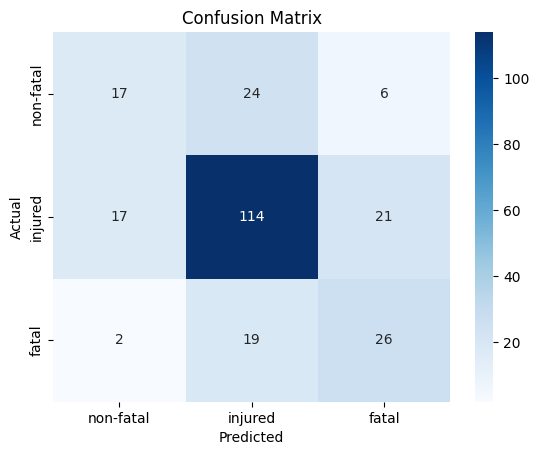

In [43]:
# Visualizing report in a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["non-fatal", "injured", "fatal"],
            yticklabels=["non-fatal", "injured", "fatal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

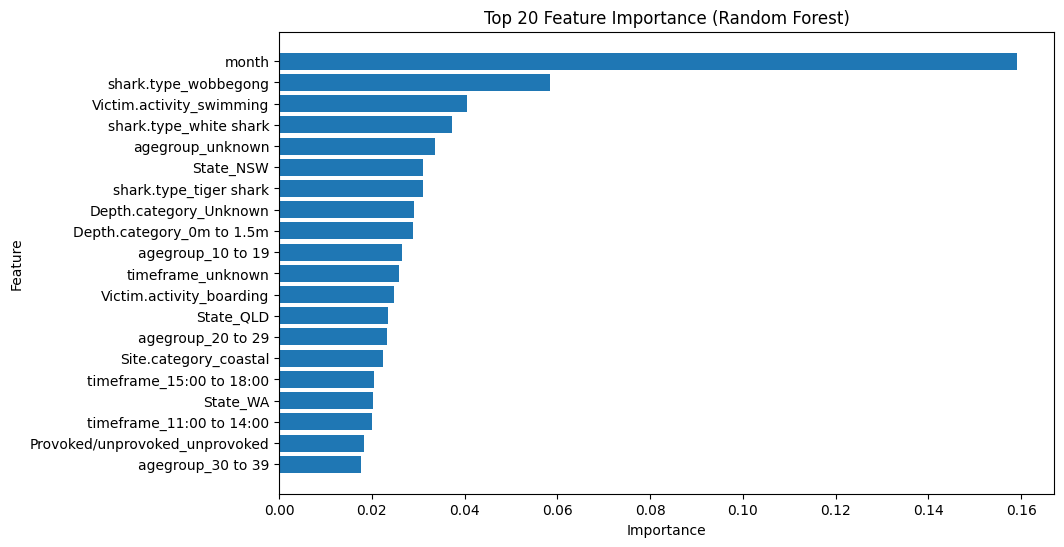

In [44]:
# Get feature importance
importance = rf.feature_importances_

# Convert to a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.show()

In [45]:
# Optimize Hyperparameters 
# Define hyperparameters to test
param_grid = {
    "n_estimators": [50, 100, 200], # Number of trees
    "max_depth": [None, 10, 20], # Depth of trees
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Search for best parameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [46]:
# Accuracy of best parameters
best_rf = grid_search.best_estimator_
print("RF Accuracy:", best_rf.score(X_test, y_test))

RF Accuracy: 0.6707317073170732


In [67]:
# Random Forest (tuned) using best parameters
rf1 = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    max_features='sqrt',
    random_state=77,
    class_weight={0:1, 1:1, 2:3}
)

In [68]:
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test,y_pred_rf1 ))

RF Accuracy: 0.6707317073170732


In [69]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf1))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf1))

Confusion Matrix:
[[ 18  23   6]
 [  9 117  26]
 [  1  16  30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.38      0.48        47
           1       0.75      0.77      0.76       152
           2       0.48      0.64      0.55        47

    accuracy                           0.67       246
   macro avg       0.63      0.60      0.60       246
weighted avg       0.68      0.67      0.67       246



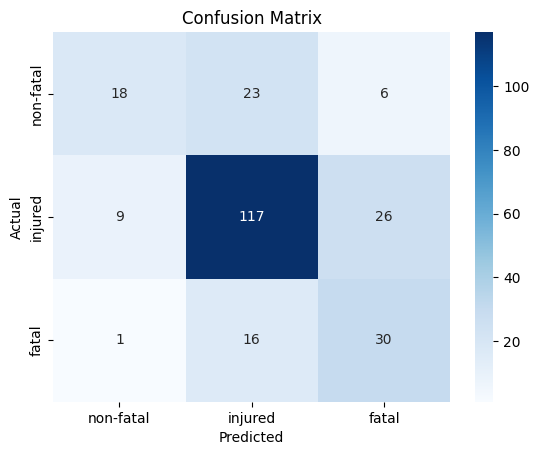

In [70]:
# Visualizing report in a confusion matrix
cm_rf1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm_rf1, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["non-fatal", "injured", "fatal"],
            yticklabels=["non-fatal", "injured", "fatal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Logistic Regression

In [71]:
# We also want to compare Random Forest results with Logistic Regression, as Logistic Regression may perform better with small dataset (<10k samples).

In [72]:
# Logistic Regression wtih scaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

logreg_scaled = make_pipeline(scaler, LogisticRegression(max_iter=1000, random_state=77))
logreg_scaled.fit(X_train, y_train)
y_pred_logreg_scaled = logreg_scaled.predict(X_test)
print("Scaled LR Accuracy:", accuracy_score(y_test, y_pred_logreg_scaled))

Scaled LR Accuracy: 0.6300813008130082


In [73]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_scaled))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_scaled))

Confusion Matrix:
[[ 19  24   4]
 [ 12 121  19]
 [  3  29  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        47
           1       0.70      0.80      0.74       152
           2       0.39      0.32      0.35        47

    accuracy                           0.63       246
   macro avg       0.55      0.51      0.52       246
weighted avg       0.61      0.63      0.62       246



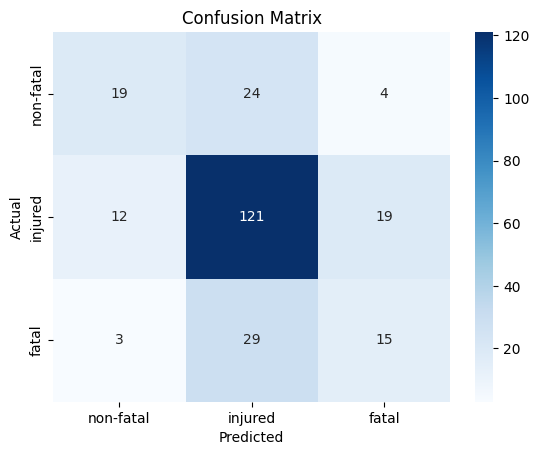

In [74]:
# Visualizing report in a confusion matrix
cm_logreg_scaled = confusion_matrix(y_test, y_pred_logreg_scaled)
sns.heatmap(cm_logreg_scaled, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["non-fatal", "injured", "fatal"],
            yticklabels=["non-fatal", "injured", "fatal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [75]:
# Logistic Regression without scaler

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
# accuracy = lr.score(X_test, y_test)
# print(accuracy)
print("Non-Scaled LR Accuracy:", accuracy_score(y_test, y_pred_logreg))
# accuracy_RF = accuracy_score(y_test, y_pred)

Non-Scaled LR Accuracy: 0.6463414634146342


In [76]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Confusion Matrix:
[[ 20  23   4]
 [ 12 125  15]
 [  2  31  14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.43      0.49        47
           1       0.70      0.82      0.76       152
           2       0.42      0.30      0.35        47

    accuracy                           0.65       246
   macro avg       0.57      0.52      0.53       246
weighted avg       0.62      0.65      0.63       246



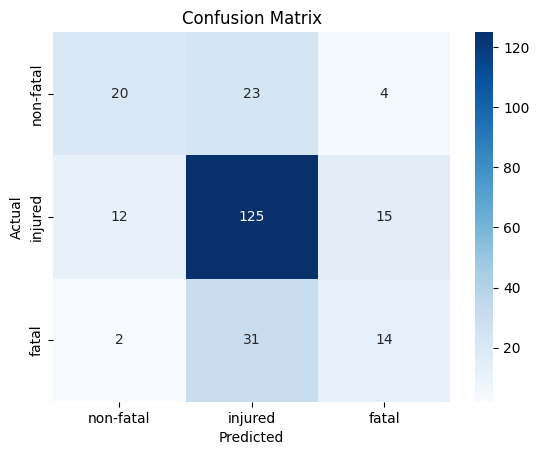

In [77]:
# Visualizing report in a confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["non-fatal", "injured", "fatal"],
            yticklabels=["non-fatal", "injured", "fatal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### XGBoost

In [78]:
import xgboost as xgb
from sklearn.metrics import classification_report

class_weights = y_train.map({0:1, 1:1, 2:3})

# Initialize XGBoost
xgboost = xgb.XGBClassifier(
    n_estimators=100,
    random_state=77,
    max_depth=3,
    learning_rate=0.1,
)

# Train 
xgboost.fit(
    X_train, y_train,
    sample_weight = class_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Predictions
y_pred_xgb = xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

[0]	validation_0-mlogloss:1.06933
[1]	validation_0-mlogloss:1.04425
[2]	validation_0-mlogloss:1.02363
[3]	validation_0-mlogloss:1.00572
[4]	validation_0-mlogloss:0.98995
[5]	validation_0-mlogloss:0.97670
[6]	validation_0-mlogloss:0.96520
[7]	validation_0-mlogloss:0.95409
[8]	validation_0-mlogloss:0.94469
[9]	validation_0-mlogloss:0.93643
[10]	validation_0-mlogloss:0.92861
[11]	validation_0-mlogloss:0.92241
[12]	validation_0-mlogloss:0.91581
[13]	validation_0-mlogloss:0.91077
[14]	validation_0-mlogloss:0.90464
[15]	validation_0-mlogloss:0.90062
[16]	validation_0-mlogloss:0.89539
[17]	validation_0-mlogloss:0.89217
[18]	validation_0-mlogloss:0.88876
[19]	validation_0-mlogloss:0.88326
[20]	validation_0-mlogloss:0.88017
[21]	validation_0-mlogloss:0.87553
[22]	validation_0-mlogloss:0.87171
[23]	validation_0-mlogloss:0.86870
[24]	validation_0-mlogloss:0.86492
[25]	validation_0-mlogloss:0.86330
[26]	validation_0-mlogloss:0.85982
[27]	validation_0-mlogloss:0.85758
[28]	validation_0-mlogloss:0.8

In [79]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[18 17 12]
 [10 90 52]
 [ 1  9 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.38      0.47        47
           1       0.78      0.59      0.67       152
           2       0.37      0.79      0.50        47

    accuracy                           0.59       246
   macro avg       0.59      0.59      0.55       246
weighted avg       0.67      0.59      0.60       246



In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

param_grid_xgb = {
    'max_depth': [3, 4],           # Shallow trees prevent overfitting
    'learning_rate': [0.05, 0.1],  # Moderate learning rates
    'n_estimators': [100],         # Fixed (use early stopping)
    'subsample': [0.8, 1.0],       # Adds randomness
    'colsample_bytree': [0.8, 1.0] # Feature randomness
}

grid_xgb = GridSearchCV(
    xgboost, param_grid_xgb, 
    cv=5, 
    scoring='f1_macro',
    refit='accuracy',  # Prioritize accuracy
    verbose=2
)
grid_xgb.fit(X_train, y_train, 
             sample_weight = class_weights,
             eval_set=[(X_test, y_test)],
             verbose=True)

print("Best params:", grid_xgb.best_params_)
best_model_xgb = grid_xgb.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[0]	validation_0-mlogloss:1.08261
[1]	validation_0-mlogloss:1.06947
[2]	validation_0-mlogloss:1.05591
[3]	validation_0-mlogloss:1.04537
[4]	validation_0-mlogloss:1.03479
[5]	validation_0-mlogloss:1.02524
[6]	validation_0-mlogloss:1.01589
[7]	validation_0-mlogloss:1.00604
[8]	validation_0-mlogloss:0.99794
[9]	validation_0-mlogloss:0.99035
[10]	validation_0-mlogloss:0.98254
[11]	validation_0-mlogloss:0.97453
[12]	validation_0-mlogloss:0.96813
[13]	validation_0-mlogloss:0.96300
[14]	validation_0-mlogloss:0.95842
[15]	validation_0-mlogloss:0.95283
[16]	validation_0-mlogloss:0.94622
[17]	validation_0-mlogloss:0.94110
[18]	validation_0-mlogloss:0.93723
[19]	validation_0-mlogloss:0.93308
[20]	validation_0-mlogloss:0.92875
[21]	validation_0-mlogloss:0.92356
[22]	validation_0-mlogloss:0.91848
[23]	validation_0-mlogloss:0.91536
[24]	validation_0-mlogloss:0.91164
[25]	validation_0-mlogloss:0.90839
[26]	validation_0-mlogloss:0.90468
[27]

In [81]:
# Tuning XGBoost based on best parameters
xgboost1 = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,  # Shallower trees prevent overfitting
    learning_rate=0.1, # Smaller steps for better convergence
    subsample=0.8,  # More randomness
    colsample_bytree=0.8,
    random_state=77
)

# Train 
xgboost1.fit(
    X_train, y_train,
    sample_weight = class_weights,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# Predictions
y_pred_xgb1 = xgboost1.predict(X_test)

print("XGBoost1 Accuracy:", accuracy_score(y_test, y_pred_xgb1))

[0]	validation_0-mlogloss:1.06964
[1]	validation_0-mlogloss:1.04469
[2]	validation_0-mlogloss:1.02311
[3]	validation_0-mlogloss:1.00661
[4]	validation_0-mlogloss:0.99124
[5]	validation_0-mlogloss:0.97766
[6]	validation_0-mlogloss:0.96542
[7]	validation_0-mlogloss:0.95413
[8]	validation_0-mlogloss:0.94508
[9]	validation_0-mlogloss:0.93613
[10]	validation_0-mlogloss:0.92758
[11]	validation_0-mlogloss:0.92009
[12]	validation_0-mlogloss:0.91394
[13]	validation_0-mlogloss:0.90786
[14]	validation_0-mlogloss:0.90339
[15]	validation_0-mlogloss:0.89975
[16]	validation_0-mlogloss:0.89295
[17]	validation_0-mlogloss:0.88838
[18]	validation_0-mlogloss:0.88197
[19]	validation_0-mlogloss:0.87786
[20]	validation_0-mlogloss:0.87365
[21]	validation_0-mlogloss:0.86919
[22]	validation_0-mlogloss:0.86564
[23]	validation_0-mlogloss:0.86203
[24]	validation_0-mlogloss:0.86021
[25]	validation_0-mlogloss:0.85702
[26]	validation_0-mlogloss:0.85537
[27]	validation_0-mlogloss:0.85246
[28]	validation_0-mlogloss:0.8

In [82]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb1))

# Classification report (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb1))

Confusion Matrix:
[[19 14 14]
 [12 94 46]
 [ 1 11 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        47
           1       0.79      0.62      0.69       152
           2       0.37      0.74      0.49        47

    accuracy                           0.60       246
   macro avg       0.58      0.59      0.56       246
weighted avg       0.67      0.60      0.61       246



### Summarizing results of tested models

In [83]:
# Classification report for Random Forest before tuning
print("Classification Report for Random Forest (before tuning):")
print(classification_report(y_test, y_pred_rf))

# Classification report for Random Forest after tuning
print("Classification Report for Random Forest (after tuning):")
print(classification_report(y_test, y_pred_rf1))

# Classification report for Logistic Regression without scaler
print("Classification Report for Logistic Regression (without scaler):")
print(classification_report(y_test, y_pred_logreg))

# Classification report for Logistic Regression with scaler
print("Classification Report for Logistic Regression (with scaler):")
print(classification_report(y_test, y_pred_logreg_scaled))

# Classification report for XGBoost before tuning
print("Classification Report for XGBoost (before tuning):")
print(classification_report(y_test, y_pred_xgb))

# Classification report for XGBoost after tuning
print("Classification Report for XGBoost (after tuning):")
print(classification_report(y_test, y_pred_xgb1))


Classification Report for Random Forest (before tuning):
              precision    recall  f1-score   support

           0       0.47      0.36      0.41        47
           1       0.73      0.75      0.74       152
           2       0.49      0.55      0.52        47

    accuracy                           0.64       246
   macro avg       0.56      0.55      0.56       246
weighted avg       0.63      0.64      0.63       246

Classification Report for Random Forest (after tuning):
              precision    recall  f1-score   support

           0       0.64      0.38      0.48        47
           1       0.75      0.77      0.76       152
           2       0.48      0.64      0.55        47

    accuracy                           0.67       246
   macro avg       0.63      0.60      0.60       246
weighted avg       0.68      0.67      0.67       246

Classification Report for Logistic Regression (without scaler):
              precision    recall  f1-score   support

      

In [65]:
# Logistic Regression (LR) model (non-scaled) gave us the best accuracy score of 0.83 amongst all the models tested. 
# This is interesting as Random Forest (RF) typically outperforms Logistic Regression, especially when RF has been tuned and imbalanced classes were addressed.
# Possible causes could be due to small or simple dataset with less than 10k samples.

# We should also look at recall score if missing attacks is costly (i.e. safety warnings) and at precision score if false alarms are costly (i.e. impact on tourism).
# Since both are somewhat equally important (fatality is a costly consequence), we will look at the F1-score, which balances precision and recall scores. 
# Both LR models here gave higher F1-score for category 2 (fatality) by about 10% more as compared to RF model.

# For LR models, scaled version is preferred as featuresare on different scales

# Conclusion: to choose Logistic Regression model with scaler for this analysis. 